# 4주차 스터디

Made by 35기 코딩부장 류제현

## 머신러닝을 위한 데이터 처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 사용할 데이터셋 불러오기
from sklearn.datasets import fetch_california_housing
dict_house = fetch_california_housing(as_frame=True)

# 딕셔너리 형태로 반환된 데이터를 예쁘게 데이터프레임 형태로 변형해보자
X = dict_house['data']
y = dict_house['target']

print(X.shape, y.shape)
X.head()

(20640, 8) (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# info로 Null값이 존재하는 지 찾아보자
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


### 1. 데이터 전처리

    1-1) Train-Test Split

ML을 위해서는 우선 데이터를 Train_set(훈련세트)와 Test_set(테스트세트)로 분리해 줘야 한다

scikit-learn의 train_test_split 함수를 사용하면 된다

-> 왜 분리 할까? : 모델을 만든 후, Test 성능 측정을 위해

In [4]:
# train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split

# 앞에서 분리해 둔 X,y를 사용 
# Shuuffle이 필요하지만, train_test_split은 shuffle을 해줌 / 시계열일 경우는 달라진다
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 잘 분리 된 것을 확인 할 수 있다
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

    1-2) 고차항 특성 추가하기

PolinomialFeature를 사용해 고차항 특성을 추가해보겠습니다

In [5]:
# reshape(-1,1)을 해주는 이유는? -> 각각을 하나의 데이터로 인식하도록 하기 위해서
X_sample = np.arange(1,5).reshape(-1,1)
X_sample

array([[1],
       [2],
       [3],
       [4]])

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# degree로 몇차식까지 추가할 지 선택할 수 있습니다
poly_features = PolynomialFeatures(degree=3, include_bias=False) # include_bias=True일 경우 1이 추가됩니다
X_poly = poly_features.fit_transform(X_sample)

X_poly

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

    1-3) 스케일 조절하기

* Normalization(정규화), MinMaxScaling(0과 1사이로 변경) 등이 있다 

* 몇몇 머신러닝 알고리즘을 제외하고는 피처(Feature)의 스케일에 민감하다. 따라서 스케일링이 필요하다

* fit을 해주면 필요한 통계량을 계산한다. 이후 transfrom 해준다. (!! Test_set에는 fit 하지 않도록 주의해야 한다 !! -> Data Leakage 누출 방지)

In [7]:
# 최소는 0, 최대는 1로 변환한다
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X_train) 

# 변형이 잘 된 것으로 확인할 수 있다
X_minmax

array([[6.81852664e-02, 2.74509804e-01, 1.60113500e-02, ...,
        3.19831624e-03, 1.61530287e-01, 6.06573705e-01],
       [2.42817340e-01, 5.29411765e-01, 3.64412717e-02, ...,
        1.99299809e-03, 5.63230606e-01, 3.10756972e-01],
       [1.70570061e-01, 1.00000000e+00, 3.35958582e-02, ...,
        1.57717811e-03, 5.55791711e-01, 2.08167331e-01],
       ...,
       [2.46341430e-02, 3.92156863e-01, 5.55408671e-03, ...,
        1.35040019e-03, 2.65674814e-02, 9.66135458e-01],
       [5.68254231e-01, 3.52941176e-01, 4.42725555e-02, ...,
        1.44859059e-03, 1.24335813e-01, 6.23505976e-01],
       [1.07764031e-01, 2.74509804e-01, 2.61771217e-02, ...,
        7.92862386e-04, 1.97662062e-01, 4.82071713e-01]])

In [8]:
# 과연 최댓값은 1로, 최솟값은 0으로 변환이 되었을 지 확인해보자 

# argmax는 최대값이 위치한 인덱스를 반환합니다(argmin은 반대)
idx_max = np.argmax(X_minmax[:,1])
idx_min = np.argmin(X_minmax[:,1])

# 최댓값은 1, 최솟값은 0으로 잘 변환이 된 것을 확인할 수 있습니다
print("최대: ", X_minmax[idx_max])
print("최소: ", X_minmax[idx_min])

최대:  [0.17057006 1.         0.03359586 0.02361321 0.02214188 0.00157718
 0.55579171 0.20816733]
최소:  [0.3285265  0.         0.04854483 0.02685681 0.02435606 0.00206127
 0.60467588 0.23406375]


In [9]:
# 많이들 익숙한 "정규화" -> 데이터의 평균이 0, 분산은 1을 따르도록 변경한다
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X_train)
X_std

array([[-1.25200957, -1.08047522, -0.90010732, ...,  0.16012868,
        -0.74004696,  0.65687689],
       [ 0.07327958, -0.04499236,  0.21110484, ...,  0.01327409,
         1.03238218, -0.82841806],
       [-0.47500765,  1.86666831,  0.0563388 , ..., -0.03738894,
         0.99955942, -1.34352035],
       ...,
       [-1.58252063, -0.60256005, -1.46889257, ..., -0.06501931,
        -1.33554565,  2.46223539],
       [ 2.54303196, -0.76186511,  0.63705937, ..., -0.0530559 ,
        -0.90416077,  0.74189377],
       [-0.95164489, -1.08047522, -0.34717671, ..., -0.13294908,
        -0.58062212,  0.03175275]])

In [10]:
# 번외: 이 정도 전처리는 싸이킷런을 안쓰고도 할 수 있어야 한다.
## 직접 정규화를 수행해 봅시다.

# 정규화 -> 평균을 빼주고, 표준편차로 나눈다 (직접 시켜보기)
mean = X_train.mean(axis=0)   # axis바꿔가며 결과 보여주기
std = X_train.std(axis=0)

# 정규화 해주자 -> 결과가 똑같이 나왔다!!!
(X_train - mean) / std 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4562,-1.251969,-1.080440,-0.900078,0.145320,-0.821577,0.160124,-0.740023,0.656856
16552,0.073277,-0.044991,0.211098,-0.053133,-0.624350,0.013274,1.032349,-0.828391
544,-0.474992,1.866608,0.056337,0.143619,-0.553596,-0.037388,0.999527,-1.343477
14027,-0.591806,0.671859,-0.527944,-0.068073,-0.537676,-0.128957,-1.349569,1.211948
18257,-0.249425,0.353259,-0.258258,0.071774,0.068156,-0.044967,0.816663,-1.253462
...,...,...,...,...,...,...,...,...
12138,-0.657225,-1.000790,-0.554901,-1.182939,-1.220454,-0.024295,-0.829111,1.176942
16396,-0.757082,-0.522891,-0.135915,-0.200404,-0.556249,-0.039235,1.112059,-0.833392
2779,-1.582470,-0.602541,-1.468845,0.245803,-1.198343,-0.065017,-1.335503,2.462156
11515,2.542950,-0.761841,0.637039,0.549292,-0.820693,-0.053054,-0.904132,0.741870


    1-4) Null값 다루기

결측치(Null)를 다루는 다양한 방법이 있습니다 (Domain 지식이 필요)

1. 유사한 값을 찾아서 넣기 (평균, 중위수 등)

2. 단순히 결측치가 존재하는 데이터를 전부 Drop 해주기

In [11]:
# 새로운 데이터셋 불러오기 (타이타닉 데이터셋)
from seaborn import load_dataset
df = load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# 이 데이터셋의  "survived","sex","age","sibsp","parch","class" 특성만 사용하겠습니다
df = df[["survived","sex","age","sibsp","parch","class"]]
df.head(6)

,survived,sex,age,sibsp,parch,class
0,0,male,22.0,1,0,Third
1,1,female,38.0,1,0,First
2,1,female,26.0,0,0,Third
3,1,female,35.0,1,0,First
4,0,male,35.0,0,0,Third
5,0,male,NaN,0,0,Third


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       714 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 35.9+ KB


In [14]:
# age의 데이터는 714개로 177개의 Null값이 존재합니다.
# 177개의 데이터는 drop하기에는 너무 많습니다. 나이의 Null값에 평균 나이를 집어 넣는 간단한 방법으로 전처리 해 보겠습니다

age_data = df['age'].values.reshape(-1,1)

## 싸이킷런의 SimpleImputer를 사용하겠습니다
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='mean')
df['age'] = impute.fit_transform(age_data)

print(df.shape)
df.head(6)

(891, 6)


,survived,sex,age,sibsp,parch,class
0,0,male,22.000000,1,0,Third
1,1,female,38.000000,1,0,First
2,1,female,26.000000,0,0,Third
3,1,female,35.000000,1,0,First
4,0,male,35.000000,0,0,Third
5,0,male,29.699118,0,0,Third


In [15]:
# fillna를 사용해서 좀 더 쉬운 풀이도 가능합니다

df.age = df.age.fillna(df.age.mean())
df.head(6)

,survived,sex,age,sibsp,parch,class
0,0,male,22.000000,1,0,Third
1,1,female,38.000000,1,0,First
2,1,female,26.000000,0,0,Third
3,1,female,35.000000,1,0,First
4,0,male,35.000000,0,0,Third
5,0,male,29.699118,0,0,Third


    1-5) 범주형 특성(Categorical Data 다루기)

* 데이터의 순서가 의미가 있는 특성이 있고, 의미가 없는 특성이 있다

* 의미가 있는 특성은 순서가 있는 변수(Ordinal Variable)로, 없는 특성은 더미변수(Dummy Variable)로 변환해준다

In [16]:
# 범주형 특성을 처리하기에 앞서, 예시를 하나 보고 넘어가도록 하겠습니다.
## 더미변수 예시 -> 값에는 First,Second,Third가 있습니다(1등석,2등석,3등석)
pd.get_dummies(df["class"])

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [17]:
# 통계학 / 계량경제학에서 사용하는 더미변수 (다중공선성(Multicollinearity) 방지)
pd.get_dummies(df["class"], drop_first=True)

,Second,Third
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [18]:
# 데이터프레임 전체를 주면 판다스가 알아서 Categorical Data를 인식해서 더미를 만든다
pd.get_dummies(df)

,survived,age,sibsp,parch,sex_female,sex_male,class_First,class_Second,class_Third
0,0,22.000000,1,0,0,1,0,0,1
1,1,38.000000,1,0,1,0,1,0,0
2,1,26.000000,0,0,1,0,0,0,1
3,1,35.000000,1,0,1,0,1,0,0
4,0,35.000000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,0,1,0,1,0
887,1,19.000000,0,0,1,0,1,0,0
888,0,29.699118,1,2,1,0,0,0,1
889,1,26.000000,0,0,0,1,1,0,0


In [19]:
# 이번엔 순서를가진(Ordinal) 데이터를 인코딩해보겠습니다
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
ordinal.fit_transform(df["class"].values.reshape(-1,1))[:10]

array([[2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.]])

### 2. Overfitting & Underfitting

1. 너무 복잡한 모델을 사용하면 -> Overfit  (Train-set에 과적합 되어 있음을 의미)

2. 너무 단순한 모델을 사용하면 -> Underfit

둘 사이의 Trade-off가 존재함

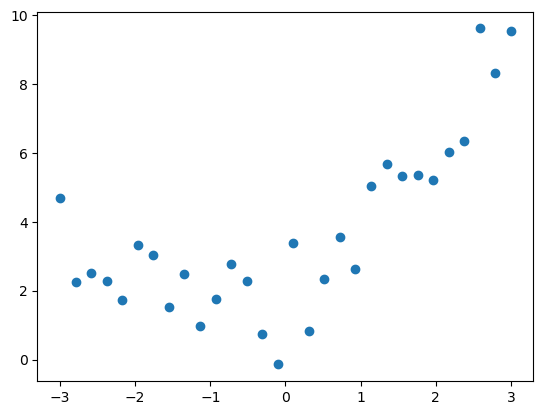

In [20]:
# 데이터 피팅을 위해서 임의의 데이터를 생성하겠습니다.
m = 30

X_new = np.linspace(-3,3,m).reshape(-1,1)
y_new = 0.5 * X_new**2 + X_new + 2 + np.random.randn(m, 1)
plt.scatter(X_new,y_new);

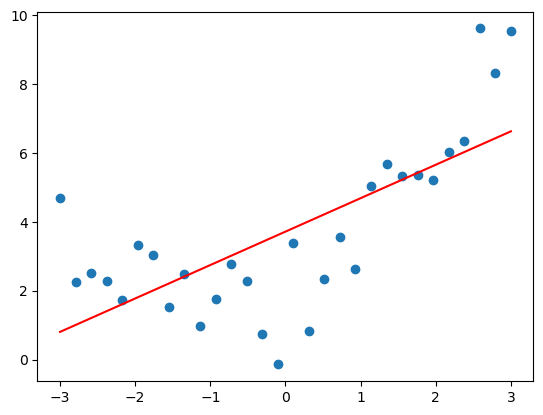

In [21]:
# Underfitting 예시 
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_new,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_new)

# 그림으로 그려보겠습니다 -> 데이터의 곡선을 똑바로 잡아내지 못 한 것을 확인할 수 있습니다
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');

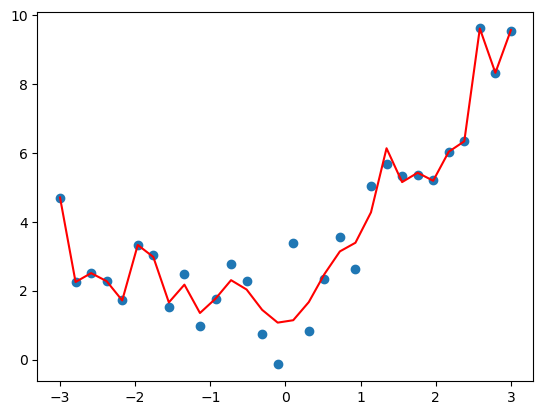

In [22]:
# Overfitting 예시 
from sklearn.linear_model import LinearRegression


poly_feature = PolynomialFeatures(degree=30)
X_poly = poly_feature.fit_transform(X_new)

# 40차항의 다항식을 회귀
linear_model = LinearRegression()
linear_model.fit(X_poly,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_poly)

# 그림으로 그려보겠습니다 -> 현재 주어진 데이터에 너무 과도하게 맞춰진 것을 확인할 수 있습니다 -> Overfit
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');